<span style="font-size:18px; font-weight:bold">Vivarium implementation of Agent-Based model for Predator-Prey</span>

<span style="font-size:14px; font-weight:bold">Agent-Based model for Predator-Prey using "mesa" library</span>

Final rabbit count: 0
Final wolf count: 3


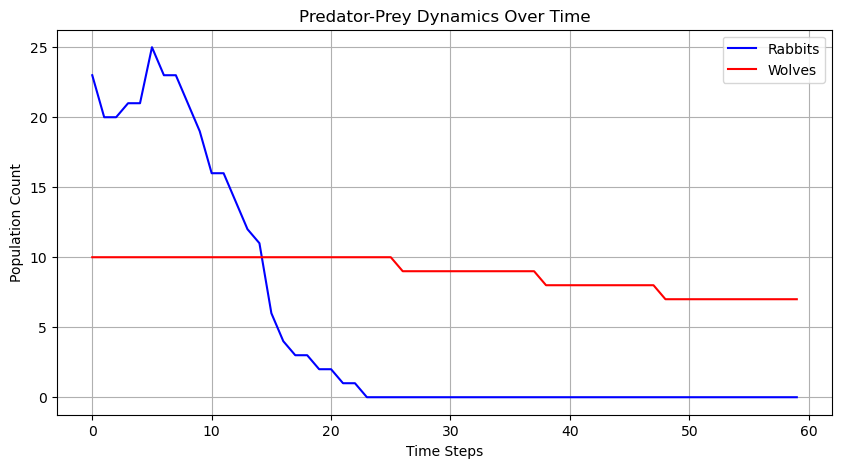

In [1]:
import mesa
import random
import matplotlib.pyplot as plt

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector



class Rabbit(Agent):
    """An agent representing a rabbit with random energy initialization and capability to move and reproduce."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.energy = random.uniform(1, 5)

    def step(self):
        # Check iff agent has a valid position
        if self.pos is None:
            return

        # agent move randomly within grid boundaries (one step in any direction, including diagonally, or no move)
        
        new_position = (self.pos[0] + random.choice([-1, 0, 1]), 
                        self.pos[1] + random.choice([-1, 0, 1]))
        if (0 <= new_position[0] < self.model.grid.width and 
            0 <= new_position[1] < self.model.grid.height):
            if self.model.grid.is_cell_empty(new_position):
                self.model.grid.move_agent(self, new_position)
                self.energy -= 0.1  # Simulate energy consumption
                
                # Reproduce if energy is high enough
                if self.energy > 2:
                    new_rabbit = Rabbit(self.model.next_id(), self.model)
                    self.model.schedule.add(new_rabbit)
                    self.model.grid.place_agent(new_rabbit, new_position)
                    self.energy /= 2  # Split energy with new rabbit

class Wolf(Agent):
    """An agent representing a wolf that can move, hunt rabbits, & potentially starve."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.energy = random.uniform(1, 5)

    def step(self):
        # Check if agent has a valid position
        if self.pos is None:
            return

        # Move randomly within grid boundaries
        new_position = (self.pos[0] + random.choice([-1, 0, 1]), 
                        self.pos[1] + random.choice([-1, 0, 1]))
        if (0 <= new_position[0] < self.model.grid.width and 
            0 <= new_position[1] < self.model.grid.height):
            if self.model.grid.is_cell_empty(new_position):
                self.model.grid.move_agent(self, new_position)

                # Check for nearby rabbits to hunt (Hunting logic)
                rabbits = self.model.grid.get_neighbors(self.pos, moore=True, radius=1, include_center=False)
                for rabbit in rabbits:
                    if isinstance(rabbit, Rabbit):
                        self.energy += 1  # get energy from catching a rabbit
                        self.model.schedule.remove(rabbit)
                        self.model.grid.remove_agent(rabbit)
                        break

                self.energy -= 0.2  # Simulate energy consumption
                if self.energy < 0:
                    self.model.schedule.remove(self)
                    self.model.grid.remove_agent(self)

class PredatorPreyModel(Model):
    """A model simulating interaction between rabbits & wolves with spatial dynamics."""
    def __init__(self, N_rabbits, N_wolves, width, height):
        super().__init__()
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.current_id = 0

        # Initialize rabbits and wolves with random positions
        for _ in range(N_rabbits):
            rabbit = Rabbit(self.next_id(), self)
            self.schedule.add(rabbit)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(rabbit, (x, y))

        for _ in range(N_wolves):
            wolf = Wolf(self.next_id(), self)
            self.schedule.add(wolf)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(wolf, (x, y))

    def next_id(self):
        """Generate a unique ID for eacha new agent."""
        self.current_id += 1
        return self.current_id

    def step(self):
        """Advance modell by one step."""
        self.schedule.step()

# Create model
model = PredatorPreyModel(20, 10, 10, 10)
for i in range(100):
    model.step()


rabbit_count = sum(isinstance(a, Rabbit) for a in model.schedule.agents)
wolf_count = sum(isinstance(a, Wolf) for a in model.schedule.agents)
print(f"Final rabbit count: {rabbit_count}")
print(f"Final wolf count: {wolf_count}")


# Create model
model = PredatorPreyModel(20, 10, 10, 10)
rabbit_counts = []
wolf_counts = []

for i in range(60):
    model.step()
    rabbit_counts.append(sum(isinstance(agent, Rabbit) for agent in model.schedule.agents))
    wolf_counts.append(sum(isinstance(agent, Wolf) for agent in model.schedule.agents))

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(rabbit_counts, label='Rabbits', color='blue')
plt.plot(wolf_counts, label='Wolves', color='red')
plt.title("Predator-Prey Dynamics Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Population Count")
plt.legend()
plt.grid(True)
plt.show()

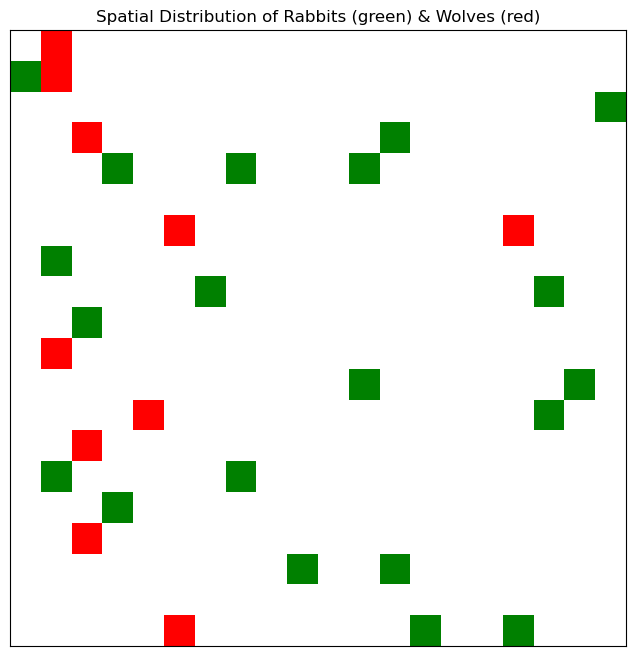

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to randomly place agents on grid
def place_agents(num_agents, grid_size):
    positions = set()
    while len(positions) < num_agents:
        position = (np.random.randint(grid_size), np.random.randint(grid_size))
        positions.add(position)
    return list(positions)

# Initialize parameters
grid_size = 20  # Size of grid
initial_rabbits = 20  # Initial number of rabbits
initial_wolves = 10  # Initial number of wolves

# Place initial rabbits & wolves
rabbit_positions = place_agents(initial_rabbits, grid_size)
wolf_positions = place_agents(initial_wolves, grid_size)

# Create a grid to visualize
grid = np.zeros((grid_size, grid_size))
for pos in rabbit_positions:
    grid[pos] += 1  # Represent rabbits with 1
for pos in wolf_positions:
    grid[pos] += 2  # Represent wolves with 2 (if overlap, wolves take precedence)


cmap = ListedColormap(['white', 'green', 'red'])  # white: empty, green: rabbit, red: wolf
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap=cmap, origin='upper')
plt.title('Spatial Distribution of Rabbits (green) & Wolves (red)')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()


<span style="font-size:18px; font-weight:bold">Vivarium implementation of Agent-Based model for Predator-Prey</span>


Simulation ID: 3ef9bc06-8723-11ef-b578-005056aeec7b
Created: 10/10/2024 at 12:18:12
Final Prey Population: 964
Final Predator Population: 9


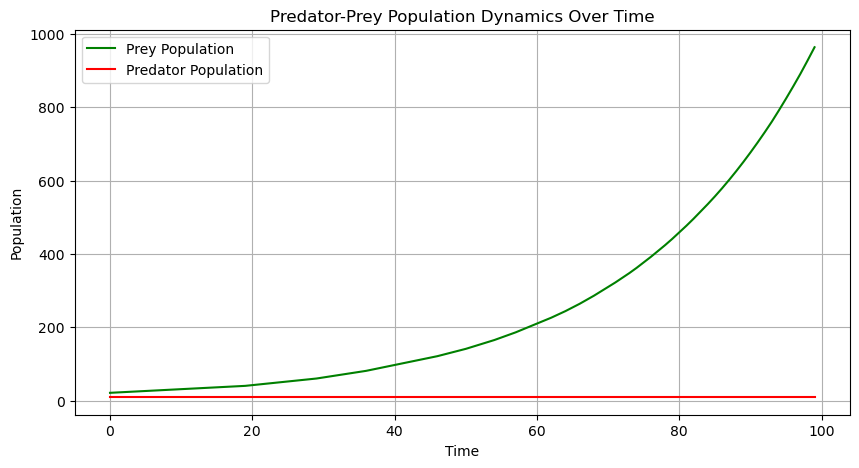

In [19]:
import matplotlib.pyplot as plt
from vivarium.core.engine import Engine
from vivarium.core.process import Process
from vivarium.core.composer import Composer
import sys
import os
from contextlib import contextmanager

# Predator-Prey Process
class PredatorPrey(Process):
    def __init__(self, parameters=None):
        super().__init__(parameters)

    # ports & their schema (structure of data)
    def ports_schema(self):
        return {
            'agents': {
                'prey': {
                    '_default': 20,  # Initial number of prey
                    '_updater': 'set',
                },
                'predators': {
                    '_default': 10,  # Initial number of predators
                    '_updater': 'set',
                }
            }
        }

    # what happens at each time step
    def next_update(self, timestep, states):
        prey = states['agents']['prey']
        predators = states['agents']['predators']
        
        # Prey reproduction & natural death
#         prey_birth_rate = 0.1  
#         prey_death_rate = 0.01
        
        prey_birth_rate = 0.05  # 
        prey_death_rate = 0.01
    
        
        # Predators consume prey
#         predation_rate = 0.02  
#         predator_reproduction_rate = 0.01  
#         predator_death_rate = 0.1 
        predation_rate = 0.05  
        predator_reproduction_rate = 0.02  
        predator_death_rate = 0.1

        # Prey dynamics
        prey_births = int(prey * prey_birth_rate)
        prey_deaths = int(prey * prey_death_rate)
        
        # Predators consume prey
        prey_consumed = min(prey, int(predators * predation_rate))  
        predator_births = int(prey_consumed * predator_reproduction_rate)
        predator_deaths = int(predators * predator_death_rate)
        
        # Update populations
        prey = prey + prey_births - prey_deaths - prey_consumed
        predators = predators + predator_births - predator_deaths
        
        # Ensure population remains non-negative
        prey = max(prey, 0)
        predators = max(predators, 0)

        return {
            'agents': {
                'prey': prey,
                'predators': predators
            }
        }

# Composer to set up simulation
class PredatorPreyModel(Composer):
    defaults = {
        'predator_prey': {
            'prey_birth_rate': 0.05,
            'prey_death_rate': 0.01,
            'predation_rate': 0.05,
            'predator_death_rate': 0.1,
            'predator_reproduction_rate': 0.02,
#             'prey_birth_rate': 0.1,
#             'prey_death_rate': 0.01,
#             'predation_rate': 0.02,
#             'predator_death_rate': 0.1,
#             'predator_reproduction_rate': 0.01,
        }
    }

    def generate_processes(self, config):
        predator_prey = PredatorPrey()
        return {'predator_prey': predator_prey}

    def generate_topology(self, config):
        return {
            'predator_prey': {
                'agents': ('agents',)
            }
        }

# Context manager to suppress stdout
@contextmanager
def suppress_stdout():
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Instantiate & run simulation
if __name__ == '__main__':
    predator_prey_model = PredatorPreyModel({})
    
    # Create engine using composer
    config = predator_prey_model.generate()
    
    # Initialize engine
    engine = Engine(processes=config['processes'], topology=config['topology'])
    
    # Variables to store population data
    prey_population = []
    predator_population = []
    
    # time step for simulation
    time_step = 0.05  # Adjust this value for different step sizes
    total_time = 100  

    # Suppress Vivarium output when running engine
    with suppress_stdout():
        for i in range(total_time):
            engine.update(time_step)  # use time_step in update function
            
            try:
                # access 'agents' state corectly, & retrieve actual data
                agents = engine.state.get_path(('agents',))
                prey = agents['prey'].get_value()  # get actual value from Store
                predators = agents['predators'].get_value()  # get actual value from Store
                
                prey_population.append(prey)
                predator_population.append(predators)
            except Exception as e:
                print(f"Error at time step {i}: {e}")
                break  

    # finall populations
    if prey_population and predator_population:
        print(f"Final Prey Population: {prey_population[-1]}")
        print(f"Final Predator Population: {predator_population[-1]}")

        
        # Create time steps array
time = list(range(len(prey_population)))

# Plot Prey & Predator population over time
plt.figure(figsize=(10, 5))
plt.plot(time, prey_population, label='Prey Population', color='green')
plt.plot(time, predator_population, label='Predator Population', color='red')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Population Dynamics Over Time')
plt.legend()
plt.grid(True)
plt.show()


<span style="font-size:18px; font-weight:bold">Sparse Identification of Nonlinear Dynamics (SINDy) to learn the governing ODEs from simulation data.</span>

<span style="font-size:14px; font-weight:bold">Rescale the simulation data.</span>

(x0)' = 0.038 1 + 0.039 x0
(x1)' = 0.000


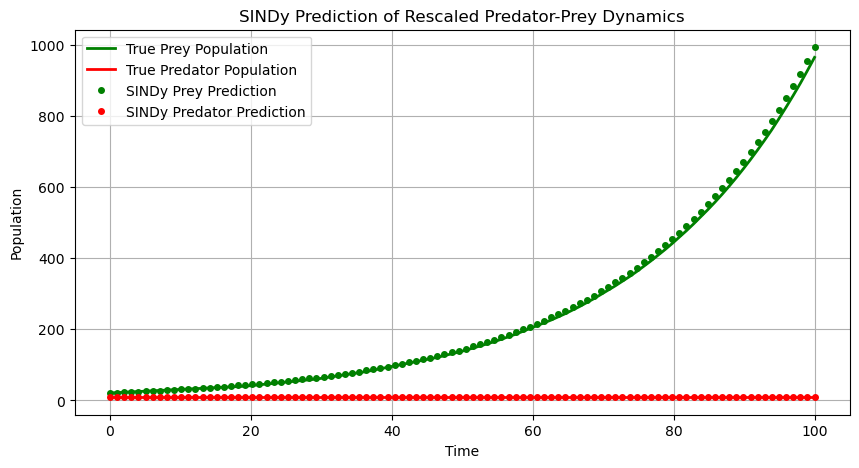

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from sklearn.preprocessing import StandardScaler

# Create time steps array by number of datta points from population data
n_steps = len(prey_population)  
#  total simulation time 
total_time = 100  
#  time array matching length of population data
time = np.linspace(0, total_time, n_steps)  
# time = np.linspace(0, 5, 100)  

# Combine prey and predator data into one dataset for SINDy
data = np.vstack([prey_population, predator_population]).T

# Rescale prey and predator populations to same scale
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Calculate time step
dt = time[1] - time[0]

# Initialize SINDy model with a lower sparsity threshold
optimizer = ps.STLSQ(threshold=1e-5)  # Lower threshold to retain more terms
sindy_model = ps.SINDy(optimizer=optimizer)

# Fit SINDy model to scaled data
sindy_model.fit(data_scaled, t=dt)

# Print discovered governing equations
sindy_model.print()

# Simulate future behavior based on learned model
x0 = data_scaled[0, :]  # Initial conditions (scaled)
predictions_rescaled = sindy_model.simulate(x0, time)

# Inverse transforme predictions to bring them back to original scale
predictions = scaler.inverse_transform(predictions_rescaled)

# Plot with solid lines for true data and dashed lines with markers for SINDy predictions
plt.figure(figsize=(10, 5))

# True Prey and Predator populations (solid lines)
plt.plot(time, prey_population, 'g-', label='True Prey Population', linewidth=2)
plt.plot(time, predator_population, 'r-', label='True Predator Population', linewidth=2)

# SINDy predictions (dashed lines with circles)
plt.plot(time, predictions[:, 0], 'go', label='SINDy Prey Prediction', markersize=4)
plt.plot(time, predictions[:, 1], 'ro', label='SINDy Predator Prediction', markersize=4)

# Plot formatting
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('SINDy Prediction of Rescaled Predator-Prey Dynamics')
plt.grid(True)
plt.show()


Fitted parameters:
 alpha = 3.4098561484937413, beta = 0.337881767726955, delta = 3.307268406607689e-06, gamma = 0.0012785727545589348


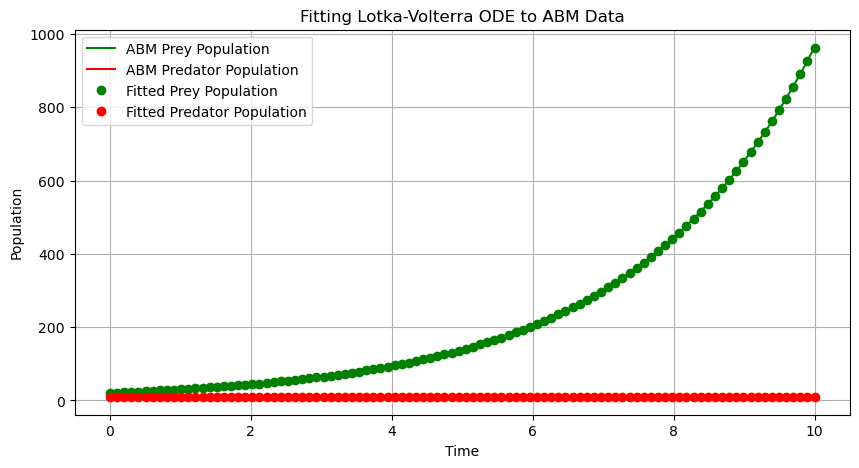

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

# Define Lotka-Volterra model correctly
def lotka_volterra(system, t, alpha, beta, delta, gamma):
    def model(s, t):
        x, y = s
        dxdt = alpha * x - beta * x * y
        dydt = delta * x * y - gamma * y
        return [dxdt, dydt]
    return odeint(model, system, t)

# Update function to use in curve_fit
def fit_lotka_volterra(t, alpha, beta, delta, gamma):
    initial_conditions = [prey_population[0], predator_population[0]]
    sol = lotka_volterra(initial_conditions, t, alpha, beta, delta, gamma)
    return np.concatenate((sol[:, 0], sol[:, 1]))

t = np.linspace(0, 10, 100)
 

initial_guess = [0.5, 0.02, 0.01, 0.1]
bounds = ([0, 0, 0, 0], [10, 1, 1, 1])  # Modified bounds

# Perform fit with increased maximum function evaluations
params, covariance = curve_fit(
    fit_lotka_volterra,
    t,
    np.concatenate([prey_population, predator_population]),
    p0=initial_guess,
    bounds=bounds,
    maxfev=20000  # maximum number of evaluations
)

# Print and plot results
alpha_fitted, beta_fitted, delta_fitted, gamma_fitted = params
print(f"Fitted parameters:\n alpha = {alpha_fitted}, beta = {beta_fitted}, delta = {delta_fitted}, gamma = {gamma_fitted}")

sol = lotka_volterra([prey_population[0], predator_population[0]], t, alpha_fitted, beta_fitted, delta_fitted, gamma_fitted)

plt.figure(figsize=(10, 5))
plt.plot(t, prey_population, 'g-', label='ABM Prey Population')
plt.plot(t, predator_population, 'r-', label='ABM Predator Population')
plt.plot(t, sol[:, 0], 'go', label='Fitted Prey Population')
plt.plot(t, sol[:, 1], 'ro', label='Fitted Predator Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Fitting Lotka-Volterra ODE to ABM Data')
plt.grid(True)
plt.show()
